### Decision Tree Classifier

### Obejctives
1. Perform Classification using Decision Trees.
2. Demonstrate Multiple Datasets
3. Perform necessary EDA.
4. Conclusions on basis of various evaluation metrics.

### Problem Statement:
Prediction of Categorical Values of the given dataset using Decision Tree Classifier.

### Approach :
Most of the part of the questions in this lab needed data visualization and data modelling, so use seaborn and matplotlib, sklearn library of python to work out the given questions.

#### Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

#### Importing the first dataset

**Data Description**
This is a dataset containing some fictional job class specs information. Typically job class specs have information which characterize the job class- its features, and a label- in this case a pay grade - something to predict that the features are related to.<br>

Content<br>
The data is a static snapshot. The contents are<br>
ID column - a sequential number<br>
Job Family ID<br>
Job Family Description<br>
Job Class ID<br>
Job Class Description<br>
PayGrade- numeric<br>
Education Level<br>
Experience<br>
Organizational Impact<br>
Problem Solving<br>
Supervision<br>
Contact Level<br>
Financial Budget<br>
PG- Alpha label for PayGrade<br>

In [2]:
#importing the dataset
df=pd.read_csv("E:\A\P\CHRIST\SEM 2\ML\LAB\jobclassinfo2.csv")

In [3]:
#preview of the dataset
df.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01


#### Dropping the Duplicates or necessary variables.

In [4]:
df=df.drop(["ID","JobFamily","JobClass"], axis=1)

In [5]:
df.head()

,JobFamilyDescription,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,Accounting And Finance,Accountant I,5,3,1,3,3,4,3,5,PG05
1,Accounting And Finance,Accountant II,6,4,1,5,4,5,7,7,PG06
2,Accounting And Finance,Accountant III,8,4,2,6,5,6,7,10,PG08
3,Accounting And Finance,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,Administrative Support,Admin Support I,1,1,0,1,1,1,1,1,PG01


### Exploratory Data Analysis

In [6]:
df.shape

(66, 11)

**Datatypes of each of the variables**

In [7]:
df.dtypes

JobFamilyDescription    object
JobClassDescription     object
PayGrade                 int64
EducationLevel           int64
Experience               int64
OrgImpact                int64
ProblemSolving           int64
Supervision              int64
ContactLevel             int64
FinancialBudget          int64
PG                      object
dtype: object

**Description of the dataset**

In [8]:
df.describe()

,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,5.696970,3.166667,1.757576,3.348485,3.606061,3.863636,4.757576,5.303030
std,2.517445,1.525005,2.134411,1.767157,1.412894,2.104109,2.468638,3.525597
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,0.000000,2.000000,3.000000,1.000000,3.000000,2.000000
50%,5.000000,4.000000,1.000000,3.000000,4.000000,4.000000,6.000000,5.000000
75%,8.000000,4.000000,2.750000,4.000000,5.000000,5.750000,7.000000,7.750000
max,10.000000,6.000000,10.000000,6.000000,6.000000,7.000000,8.000000,11.000000


**Creating a function to display the values in a categoricals variables with it's count**

In [9]:
def valuecounts(a):
    categorical_features=[i for i in a.columns if a.dtypes[i]==object]
    for i in categorical_features:
        print("\n",a[i].value_counts())
    return categorical_features
    

In [10]:
categorical_features_df=valuecounts(df)


 Communications And Media    10
Buildings And Facilities     8
Administrative Support       5
Corporate Research           5
Produce                      5
Systems Analyst              5
Accounting And Finance       4
Meat Cutter                  4
Baker                        3
Buyer                        3
Cashier                      3
Finance  And Accounting      3
Human Resources              3
Stockkeeping                 3
Secretary                    2
Name: JobFamilyDescription, dtype: int64

 Accountant I           1
Meat Cutter III        1
Printing IV            1
Data Scientist         1
Research  Analyst I    1
                      ..
Communications II      1
Communications III     1
Photographer  I        1
Photographer II        1
Systems Analyst V      1
Name: JobClassDescription, Length: 66, dtype: int64

 PG05    15
PG06     7
PG08     7
PG03     7
PG04     7
PG10     6
PG09     6
PG02     5
PG07     4
PG01     2
Name: PG, dtype: int64


In [11]:
for i in categorical_features_df:
    print("\n",i,"has", np.count_nonzero(df[i].unique()), "unique entries")
# np.count_nonzero(df['JobClassDescription'].unique())


 JobFamilyDescription has 15 unique entries

 JobClassDescription has 66 unique entries

 PG has 10 unique entries


**Checking of missing values**

In [12]:
df.isnull().sum()

JobFamilyDescription    0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

**Inference:** No missing values present.

### HeatMap

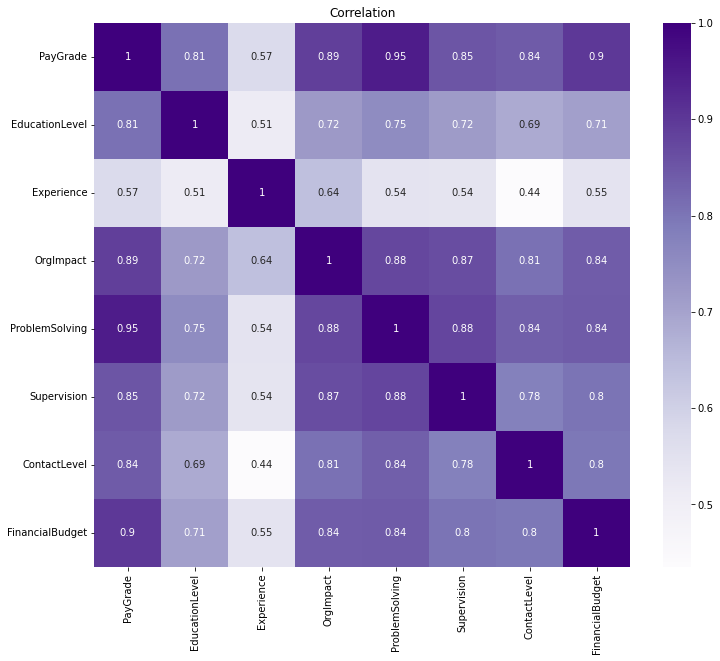

In [13]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="Purples")
plt.title("Correlation")
plt.show()

**Inference:** <br> There is significantly strong correlation between the variables, except for a few ones. <br>
There is an weak positive correlation between EducationLevel and Experience(+0.51), Experience and ContactLevel(+0.44), ContactLevel and Supervision(+0.54), ContactLevel and ProblemSolving(0.54) ,EducationLevel and PayGrade(0.57)<br>
No negative correlation between any variables.

### BoxPlot

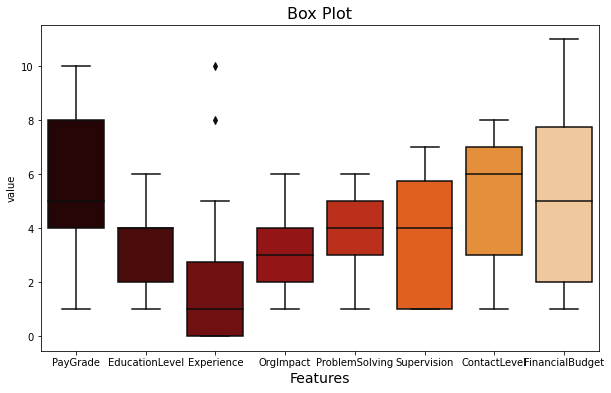

In [14]:
df_1=pd.melt(df[["PayGrade","EducationLevel","Experience","OrgImpact","ProblemSolving","Supervision","ContactLevel","FinancialBudget"]])
plt.figure(figsize=(10,6))

boxplot1=sns.boxplot(x="variable", y="value", data=df_1, palette="gist_heat")
boxplot1.axes.set_title("Box Plot", fontsize=16)
boxplot1.set_xlabel("Features", fontsize=14)

plt.show()

#### Bar Plot

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\AppData\Local\Temp/ipykernel_1824/1505948674.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


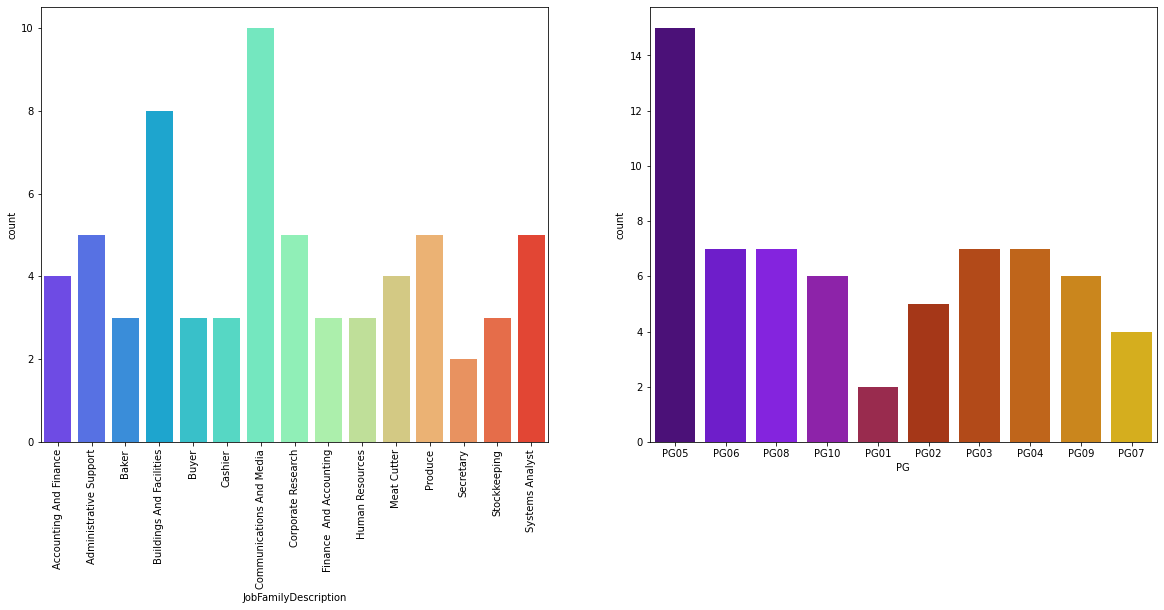

In [15]:
fig,ax =plt.subplots(1,2, figsize=(20,8))

chart=sns.countplot(df['JobFamilyDescription'], ax=ax[0],palette = "rainbow")
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

sns.countplot(df['PG'], ax=ax[1],palette = "gnuplot")

fig.show()

**Inference:**
In the figure 1 we can say that the number of applicants are of "Communication and Media" domain follwed by Buildings and Facilities, Administrative Support, System Analyst and others.<br>
In the figure 2 we can see that number of applicants for PG05 Alpha label for PayGrade is significant is high than any other PayGrades.

### Label Encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.<br>

**Creating a function for label encoding**

In [16]:
def label_encoding(a,b):
    for i in b:
        a[i]=LabelEncoder().fit_transform(a[i])

In [17]:
label_encoding(df,categorical_features_df)

#### Storing dependent and independent variables seperately.

In [18]:
X=df.drop(["PG"], axis=1)
y=df["PG"]

### Data Modelling

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [20]:
X_train.shape

(52, 10)

In [21]:
X_test.shape

(14, 10)

In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf_model1=clf.fit(X_train, y_train)
y_pred = clf_model1.predict(X_test)

#### Evaluation Metrics

#### Confusion Matrix
The confusion matrix is a matrix used to determine the performance of the classification models for a given set of test data.<br>
It can only be determined if the true values for test data are known. The matrix itself can be easily understood, but the related terminologies may be confusing.<br>
Since it shows the errors in the model performance in the form of a matrix, hence also known as an error matrix. Some features of Confusion matrix are given below:<br>

For the 2 prediction classes of classifiers, the matrix is of 2*2 table, for 3 classes, it is 3*3 table, and so on.<br>
The matrix is divided into two dimensions, that are predicted values and actual values along with the total number of predictions.<br>
Predicted values are those values, which are predicted by the model, and actual values are the true values for the given observations.<br>

It looks like the below table:
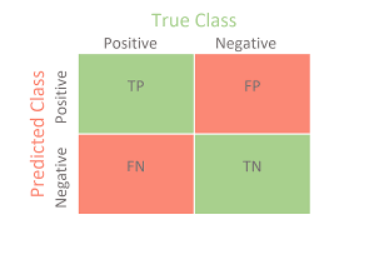
The above table has the following cases:<br>

True Negative: Model has given prediction No, and the real or actual value was also No.<br>
True Positive: The model has predicted yes, and the actual value was also true. <br>
False Negative: The model has predicted no, but the actual value was Yes, it is also called as Type-II error.<br>
False Positive: The model has predicted Yes, but the actual value was No. It is also called a Type-I error.

#### Accuracy Score <br>
Machine learning model accuracy is the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training, data. <br>
The better a model can generalize to ‘unseen’ data, the better predictions and insights it can produce, which in turn deliver more business value.

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nAccuracy score: ",accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 2 0]
 [0 0 0 0 0 0 0 0 1]]

Accuracy score:  0.9285714285714286


**Inference:** <br>In the confusion matrix our model incorrectly predicts only one output.<br> For the accuracy score we ca say that our model predicts 92.85 % correct output.


### Decision Tree Diagram

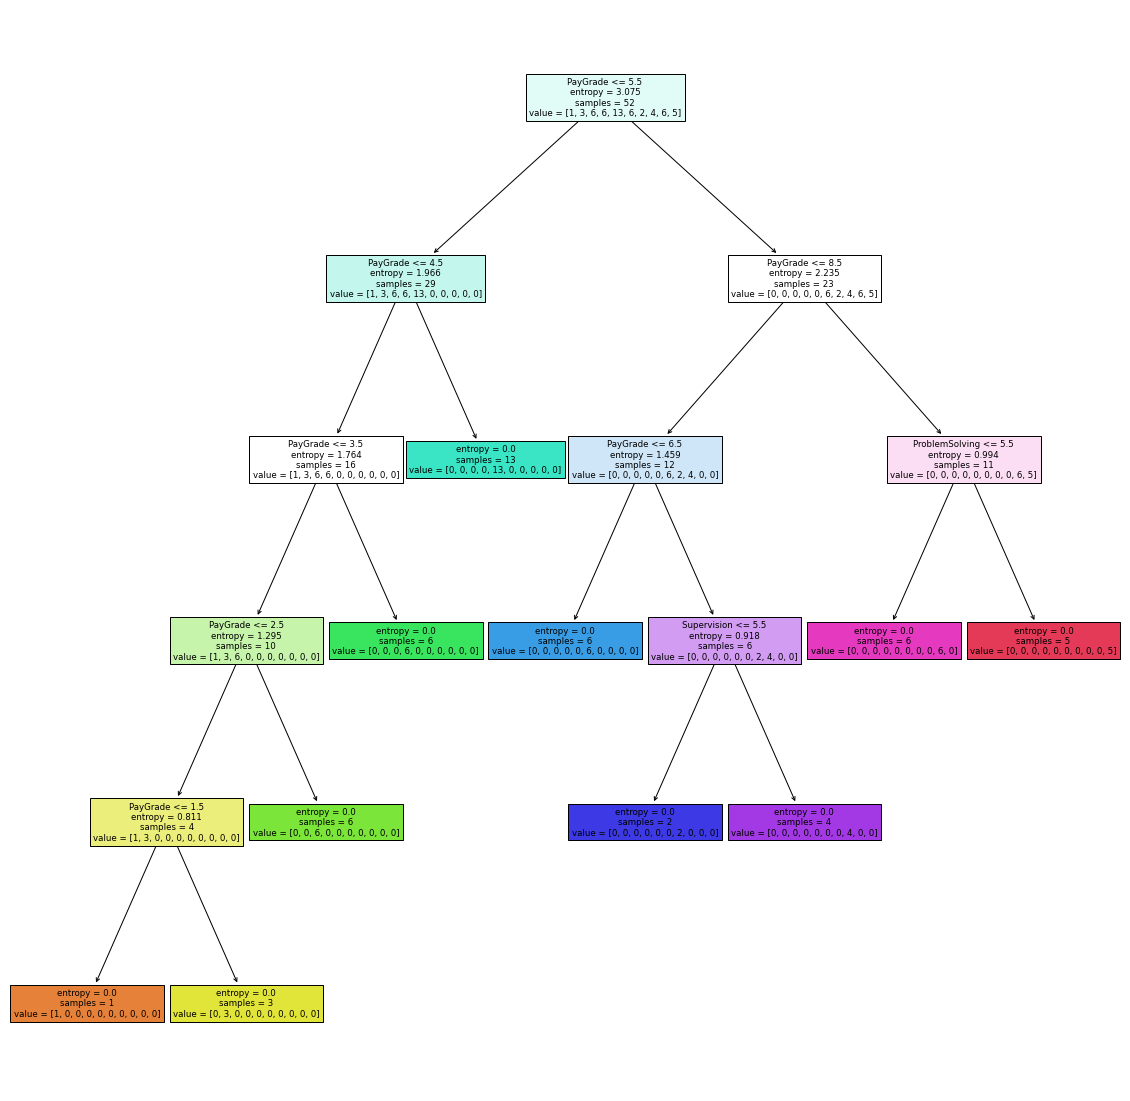

In [24]:
from sklearn import tree
fn=X.columns
cn=y.unique()

plt.figure(figsize=(20,20))
tree.plot_tree(clf_model1,
               feature_names = fn, 
               class_names=cn.sort(),
               filled = True);